In [3]:
import numpy as np # pour les maths
import matplotlib.pyplot as plt # pour charger et afficher les images
from skimage import data, io, exposure, filters, util # pour le traitement des images

Matplotlib is building the font cache; this may take a moment.


## 1. Introduction à scikit-image

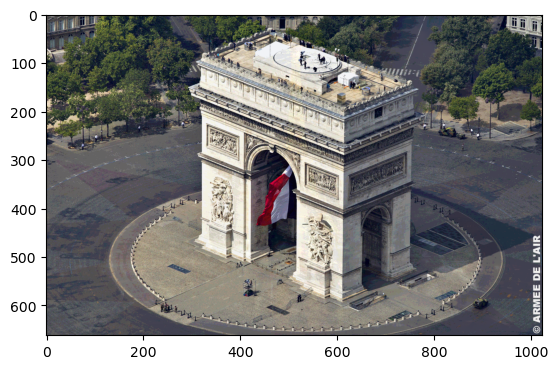

In [4]:
image = plt.imread('paris.png')
plt.imshow(image)
plt.show()

In [5]:
print(np.shape(image))

(662, 1024, 3)


In [6]:
image[58, 70]

array([0.31764707, 0.32156864, 0.20784314], dtype=float32)

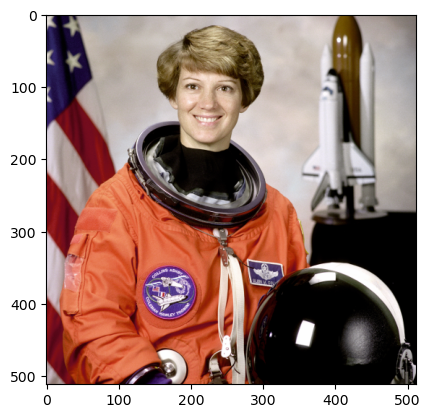

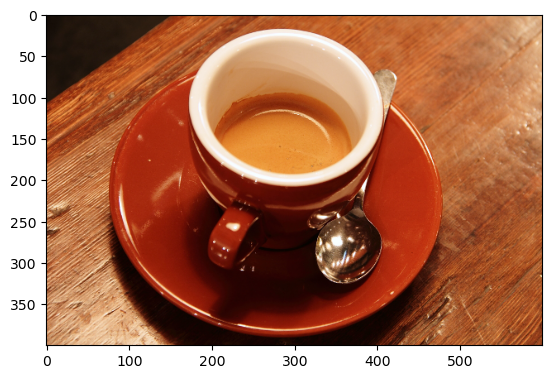

In [7]:
im1 = data.astronaut()
im2 = data.coffee()
plt.imshow( im1 )
plt.show()
plt.imshow( im2 )
plt.show()

In [8]:
def degrade(h, l):
    res = 255 * np.ones((h, 256*l), dtype=np.uint8)
    for i in range(h):
        for j in range(1, 256*l+1) :
            res[i, j-1] = np.trunc((j-1)/l) # Partie entière
    return res

### Exercice 1
1. Créer une image en niveaux de gris `X1` codée sur 8 bits ayant M = 200 lignes et N = 300 colonnes. Cette image a un fond gris clair et contient une bande horizontale de couleur noire et d’une largeur de 10 pixels.

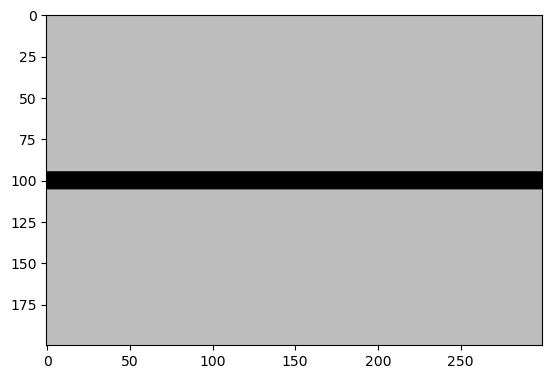

In [9]:
X1 = 190 * np.ones((200, 300))

for i in range(95, 106):
    for j in range(300):
        X1[i][j] = 0

plt.imshow(X1, cmap='gray', vmin=0, vmax=255)
plt.show()

2. Créer une image en niveau de gris `X2` codée sur 8 bits ayant M = 200 lignes et N = 300 colonnes. Cette image a un fond gris foncé et contient un carré gris clair de taille 30 × 30. Faire en sorte que le carré soit situé vers le milieu de l’image.

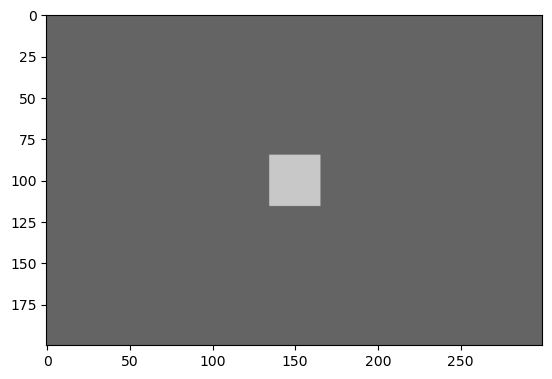

In [10]:
X2 = 100 * np.ones((200, 300), dtype = np.uint8)

for i in range(85, 116):
    for j in range(135, 166):
        X2[i][j] = 200

plt.imshow(X2, cmap='gray', vmin=0, vmax=255)

### Exercice 2
1. Charger l'image `test-couleurs.png`. L'appeler $I_1$.

In [11]:
I1 = plt.imread("test-couleurs.png")

2. Créer les trois matrices `R = I1[:, :, 0]` , `G = I1[:, :, 1]` et `B = I1[:, :, 2]` puis les afficher. À quoi correspondent ces trois matrices ?

In [12]:
R = I1[:, :, 0]
G = I1[:, :, 1]
B = I1[:, :, 2]

### Exercice 3
1. Écrire un script réalisant un damier alternant des pixels rouges, ayant pour coordonnées
RVB : (255,0,0) et des pixels verts, ayant pour coordonnées RVB : (0,255,0). La matrice du rouge est donc une
alternance de 255 et de 0, celle du vert de 0 et de 255, celle du bleu ne contient que des 0.
Les paramètres m et n représentent respectivement le nombre de lignes et le nombre de colonnes du damier.

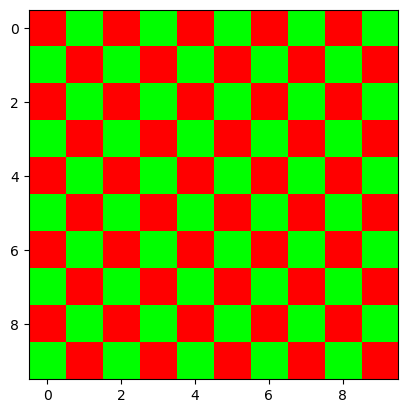

In [13]:
damier = np.ones((10, 10, 3), dtype=np.uint8)

for i in range(10):
    for j in range(10):
        damier[i][j] = [0, 255, 0] if (i + j) % 2 else [255, 0, 0]

plt.imshow(damier)

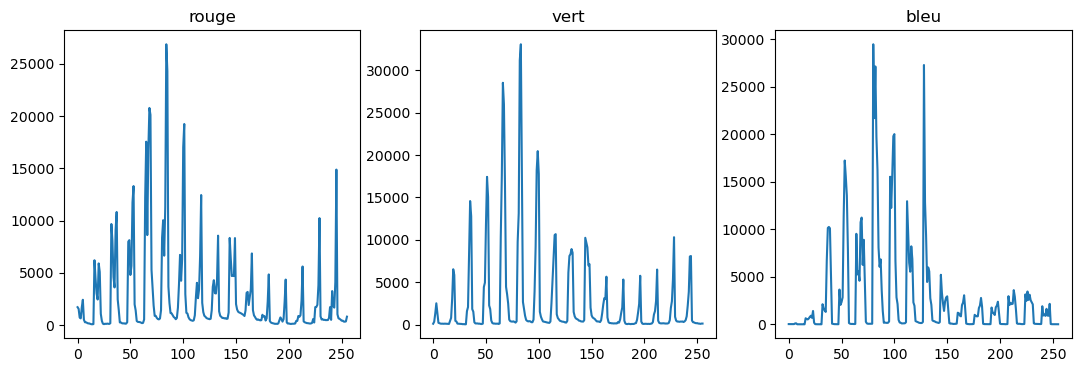

In [14]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (13,4))
canals = ['rouge', 'vert', 'bleu']

for i, canal in enumerate(canals):
    hist = exposure.histogram( image[ : , : , i] )
    axs[i].plot(hist[0])
    axs[i].set_title(canal)

### Exercice 4
1. Ouvrir l’image `lena.png` et la stocker dans la variable `lena`.

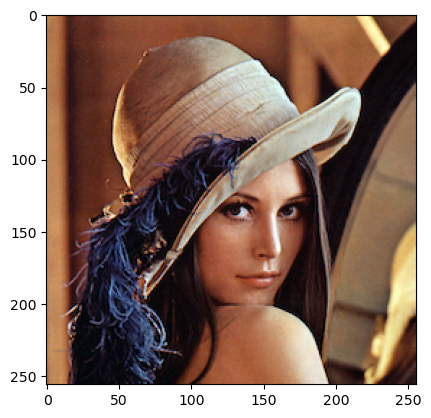

In [46]:
lena = plt.imread("lena.png")
plt.imshow(lena)

2. La convertir en niveau de gris avec la commande :

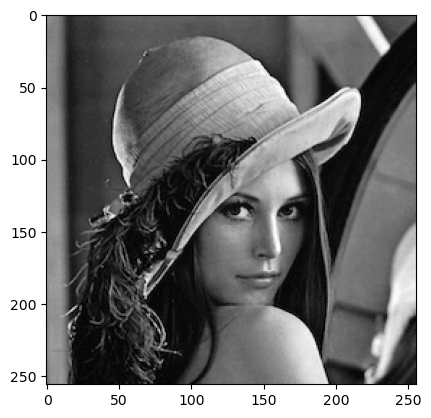

In [47]:
from skimage import color
lena = color.rgb2gray(lena)
plt.imshow(lena, cmap="gray")

3. Exécuter la commande `print(lena)` pour vérifier que l’image a été renormalisée (tous les coefficients sont compris entre 0 et 1).

In [17]:
any(any(val < 0 or val > 1 for val in row) for row in lena)

False

4. Afficher son histogramme.

In [125]:
def histo(image):
    _, ax = plt.subplots(figsize = (13,4))
    hist, _ = exposure.histogram(image)
    ax.plot(hist)

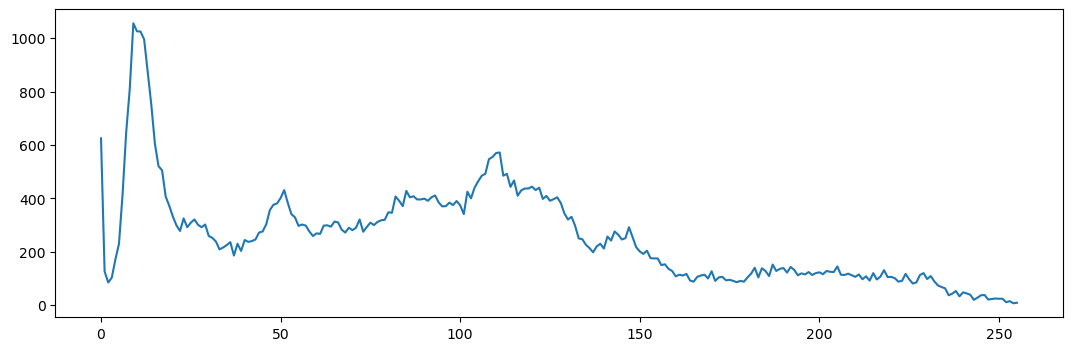

In [93]:
histo(lena)

5. Une image étant un tableau nous pouvons lui appliquer une fonction (bien définie) pour en modifier les niveaux de gris. Par exemple, si on peut utiliser les fonctions suivantes :
$$f(x) = \sqrt{x} \quad\text{et}\quad g (x) = x^2$$
Quel(s) effet(s) procure ces fonction sur l’image ?

In [19]:
lena.shape

(256, 256)

In [83]:
def apply(X, func):
    Xs = X.copy()
    w, h, *_ = np.shape(X)
    for i in range(w):
        for j in range(h):
            Xs[i][j] = func(Xs[i][j])
    return Xs

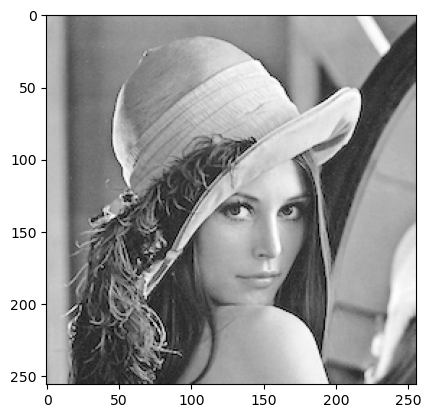

In [21]:
lena2 = apply(lena, lambda x: np.sqrt(x))
plt.imshow(lena2, cmap="gray")

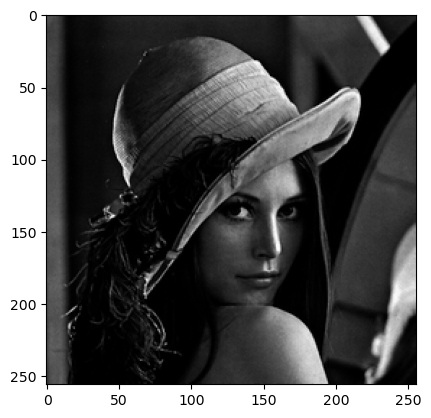

In [22]:
lena3 = apply(lena, lambda x: x*x)
plt.imshow(lena3, cmap="gray")

6. Écrire une fonction teinte(image, h) qui ajoute la valeur h à chaque pixel de l’image image pour h ∈ [−1; 1] (attention à ne pas dépasser les valeurs autorisées !). Tester votre fonction avec quelques valeurs de h et afficher les nouveaux histogrammes.

In [56]:
from math import floor, ceil
def teinte(image, h):
    #assert -1 <= h <= 1, f"h must be in [-1; 1] (got {h})"
    return apply(image, lambda val: max(min(val + h, 1), 0))

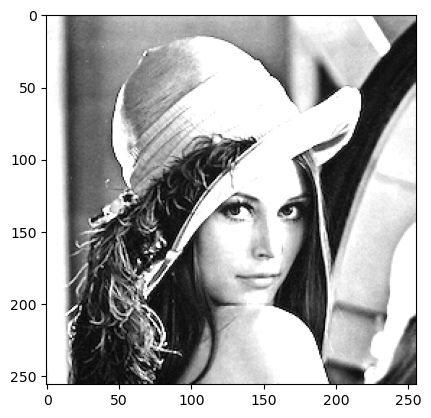

In [126]:
lena4 = teinte(lena, 0.5)
plt.imshow(lena4, cmap="gray")

## 2. Look Up Table 

### 1. Recadrage de l'histogramme

1. Écrire une fonction qui modifie les niveaux de gris des pixels de telle sorte que la dynamique des niveaux de gris soit comprise entre 0 et 255 (recadrage dynamique). On pourra utiliser les fonctions `min(M)` (et `max(M)`) qui retourne la valeur minimale (et maximale) des coefficients de la matrice M .

In [120]:
def recadrage(image):
    vmin = np.min(image)
    vmax = np.quantile(image, 0.95)
    vrange = vmax - vmin
    ratio = 255 / vrange
    return apply(image, lambda x: min((x - vmin) * ratio, 255))

2. Tester la fonction avec l’image `hotel-de-ville.pgm`. Afficher les deux histogrammes avant/après traitement.

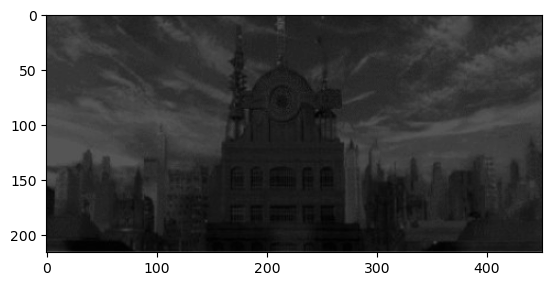

In [121]:
hotel = plt.imread('hotel-de-ville.pgm')
plt.imshow(hotel, cmap="gray")

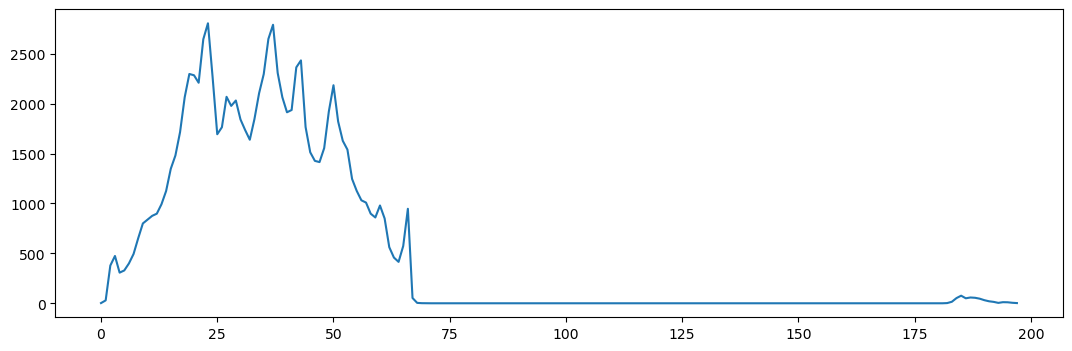

In [122]:
histo(hotel)

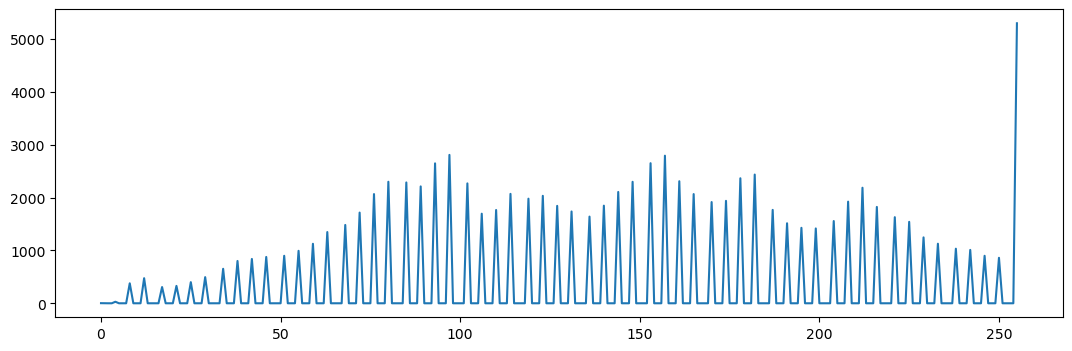

In [123]:
hotel2 = recadrage(hotel)
histo(hotel2)

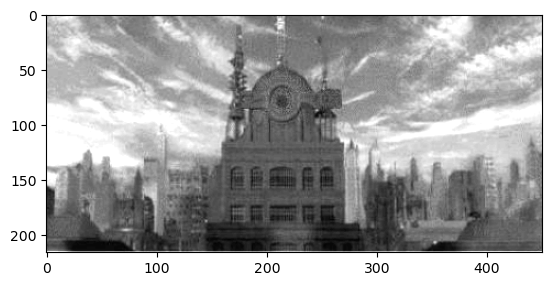

In [124]:
plt.imshow(hotel2, cmap="gray")

### 2. Egalisation de l'histogramme

1. Ecrire une fonction qui modifie les niveaux de gris des pixels par une égalisation d’histogramme et qui
affiche l’histogramme et l’histogramme cumulé de l’image résultante.

In [144]:
def equalize(image):
    hist, bins = np.histogram(image)
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]
    return np.interp(image.flatten(), bins[:-1], cdf_normalized).reshape(image.shape)

2. Tester votre fonction sur l’image `port.pgm`.
Afficher les deux histogrammes avant/après traitement.

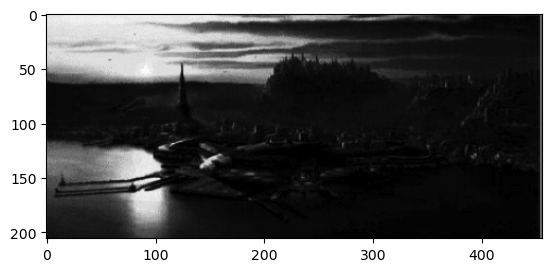

In [145]:
port = plt.imread('port.pgm')
plt.imshow(port, cmap="gray")

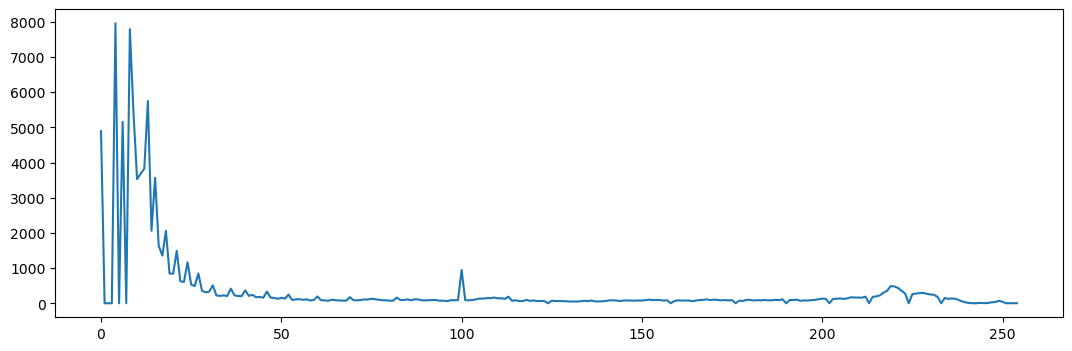

In [146]:
histo(port)

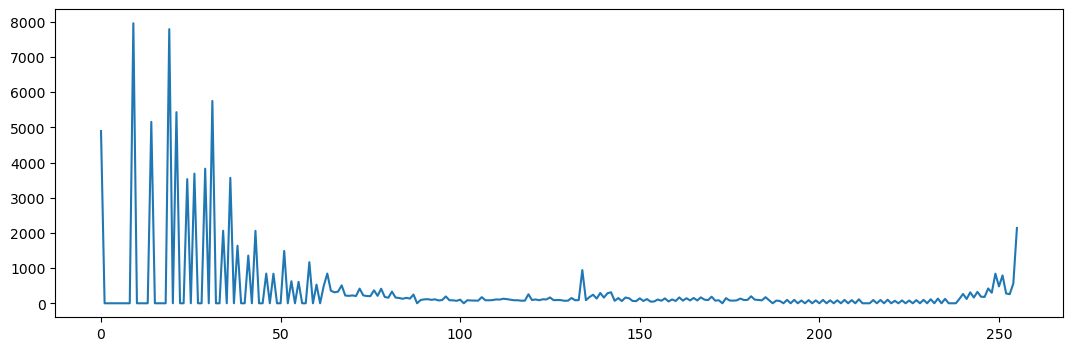

In [149]:
port2 = equalize(port)
histo(port2)

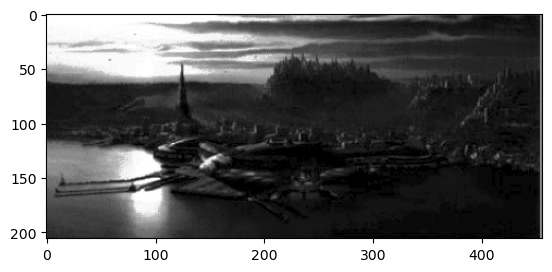

In [151]:
plt.imshow(port2, cmap="gray")

## 3. Masque de convolution

In [161]:
cameraman = io.imread('cameraman.pgm') # image en uint8
print(cameraman)

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]


In [164]:
cameraman_norm = cameraman / (2**8-1)
print(cameraman_norm)

[[0.61176471 0.62352941 0.61960784 ... 0.59215686 0.59607843 0.59607843]
 [0.62745098 0.60392157 0.61568627 ... 0.60392157 0.60784314 0.6       ]
 [0.61176471 0.62352941 0.61960784 ... 0.59215686 0.59607843 0.59607843]
 ...
 [0.44705882 0.51764706 0.48235294 ... 0.52941176 0.5372549  0.44705882]
 [0.4745098  0.49411765 0.50980392 ... 0.52156863 0.50980392 0.44313725]
 [0.4745098  0.49411765 0.50980392 ... 0.52156863 0.50980392 0.44313725]]


### Exercice 5

1. Charger l’image `lena_bruit.pgm` puis la visualiser.

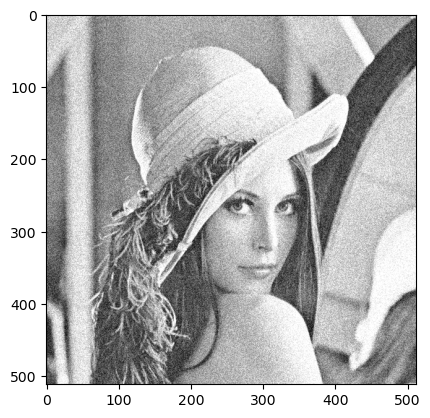

In [167]:
lena_bruit = plt.imread('lena_bruit.pgm')
plt.imshow(lena_bruit, cmap="gray")

**Filtre gaussien**

In [188]:
from skimage.filters import gaussian, median
from scipy.ndimage import uniform_filter

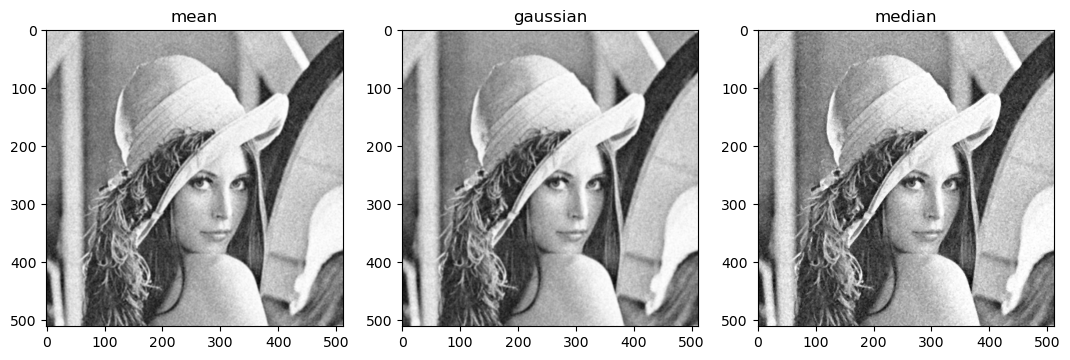

In [190]:
methods = [uniform_filter(lena_bruit, size=3),
           gaussian(lena_bruit),
           median(lena_bruit)]

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (13,4))
canals = ['mean', 'gaussian', 'median']

for i, canal in enumerate(canals):
    axs[i].imshow(methods[i], cmap="gray")
    axs[i].set_title(canal)